<H1>Animation and Interactive Demonstration</H1>
<p>This notebook is to demonstrate animation and interactive elements in python + Jupyter.</p>
<h2>Animation Background</h2>
<p>The animation is a part of matplotlib.  For the animation, we create a function that generates each frame.  This function is passed to the matplotlib.animation class creator <a href = http://matplotlib.org/1.5.3/api/animation_api.html#matplotlib.animation.FuncAnimation>FuncAnimation</a> to generate the animation.  We can then display that animation in the notebook and/or save it to a file.  Some good resources to understand animation using matplotlib are:
<ul>
<li>The method used in this example requires <a href = https://ffmpeg.org/>FFmpeg</a> be installed.  FFmpeg has a <a href=https://github.com/FFmpeg/FFmpeg#readme>github page</a>, and files for windows may be downloaded from <a href=https://ffmpeg.zeranoe.com/builds/>here</a>.  There is not a install exe so you will need to follow <a href = http://www.wikihow.com/Install-FFmpeg-on-Windows>these instructions</a> to install FFmpeg on windows.</li>
<li><a href= http://louistiao.me/>Louis Tiao</a> has a good example of <a href = http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/> creating an animation in Jupyter</a>.  He expains how it is now possible to embed the animation in the notebook directly rather than saving the file.  This example uses these methods.  His example is based on an <a href = https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/>earlier example</a> for which direct embeding was not an option.</li>
<li><a href = https://www.labri.fr/perso/nrougier/>Nicolas Rougier</a> has a good explanation of using matplotlib including its <a href = https://www.labri.fr/perso/nrougier/teaching/matplotlib/#animation>animation ability</a>.</li>
<li><a href = https://www.labri.fr/perso/nrougier/>Nicolas Rougier</a> also has a good example of <a href=https://www.labri.fr/perso/nrougier/teaching/matplotlib/#earthquakes>animations showing earthquake data</a> from <a href = http://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php >the USGS online earthquake feed</a></li>
<li>The matplotlib <a href = http://matplotlib.org/api/animation_api.html>animation documentation</a> is not geared towards a beginer.  The main function in this example is <a href = http://matplotlib.org/1.5.3/api/animation_api.html#matplotlib.animation.FuncAnimation>FuncAnimation</a> 
</ul>
</p>
<h2>Interactive Elements Background</h2>
<p>The imports from ipywidgets allow us to create interactive sliders and other elements in the notebook.  Some good information on this is at
<ul>
<li>Domino has a <a href = https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/>good introduction with examples</a> of using interactive elements in Jupyter.</li>
<li>ipywidgets has a good <a href=https://ipywidgets.readthedocs.io/>documentation site</a>.  Of special importance for the beginer is <a href=https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html>Using Interact</a></li>
<li>The ipywidgets github page has a good <a href=https://github.com/ipython/ipywidgets#readme>readme page</a></li>
</ul>
</p>
<h2>Initialization</h2>
<p>For this demonstration, we need to import several modules.</p>


In [1]:
import numpy as np

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
matplotlib.rc('animation', html='html5')

from ipywidgets import interact, interactive, widgets
from IPython.display import display

<p>A good explanation of why we are importing pyplot as plt rather importing pylab is found <a href=http://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related>on the matplotblib documentation</a> and in the <a href = http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb>documentation on using matplotlib in Jupyter.</a>  Esentially, since we are doing an animation we need the figure object to persit past a single line.  This way we keep access to the same figure and axes.  Also, the axes are the basic object in matplotlib, not figure.  The figure is a container for the axes, and there could be muliple sets of axes.  The plots (actually matplotlib <a href = http://matplotlib.org/api/lines_api.html>line objects</a>) are objects of the axes, not the figure.<p>

<h2>Animation Example</h2>
<p>This example is based mainly on <a href = http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/>this example</a>.
<p>In the code below:
<ul>
<li>The <a href = http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots>subplots</a> function returns a tuple of the figure object and the axes it contains.  Note again that the <a href = http://matplotlib.org/api/axes_api.html>axes object</a> is the object we will manipulate to control the animation.  The <code>MyAxes</code> variable is an instance of a matplotlib <a href = http://matplotlib.org/api/axes_api.html>axes</a> object.</li>
<li>The calls to <code>set_xlim</code> and <code>set_ylim</code> set the x and y axis ranges.</li>
<li>For the <code>.plot([], [], lw=2)</code> function call:
<ul>
<li>Even though it is not documented in the <a href = http://matplotlib.org/api/axes_api.html>axes object</a> documentation, plot is a method of the axes object.  It behaves exactly as the <a href=http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot>pyplot.plot function</a>.</li>
<li>The plot method returns a list of <a href = http://matplotlib.org/api/lines_api.html>lines objects</a> that were created.</li>
<li>Since there was only one line created, there is only one element in the returned list.  We get the first element rather than the list with the <code>','</code> in <code>"MyLine, =".</code></li>
<li>This line object happens to have no data assigned to it as the x and y data positional arguments are empty lists, '<code>[]</code>.'</li>
<li>The <code>lw=2</code> argument sets the linewidth.</li>
</ul>
</ul>
</p>

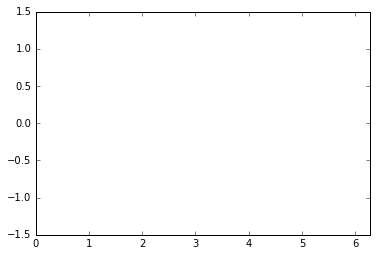

In [2]:
MyFigure, MyAxes = plt.subplots()
MyAxes.set_xlim(( 0, 2*np.pi))
MyAxes.set_ylim((-1.5, 1.5))
MyLine, = MyAxes.plot([], [], lw=2)

<p>In the cell below, we setup the animation.  Some references for the <a href =https://docs.scipy.org/doc/numpy/index.html>numpy</a> functions used are:
<ul>
<li><a href=https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html><code>linspace</code></a></li>
<li><a href=https://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html><code>np.sin</code></a></li>

</ul>

In [3]:
x=np.linspace(0,2*np.pi)
AnimationFrames = 100  #total number of frames in animation.
DelayBetweenFrames = 20 #in msec (20 gives 50 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 2.0 seconds long.


<p>In the following cell, we define the animation function or the function that will be called for each frame.  This function should return a touple of anything that has changed from the previous frame.  The function accepts one argument, the number of the animation frame.</p>
<p>Since we want a sin wave that looks like it is continously moving, we will adjust the phase.  We adujst the phase by exactly $2\pi$ over one animation loop so that the animation looks continous.</p>

In [4]:
def a(i):
    y = np.sin(x + 2*np.pi*i/AnimationFrames)
    MyLine.set_data(x, y)
    return (MyLine,)

<p><a href = http://matplotlib.org/1.5.3/api/animation_api.html#matplotlib.animation.FuncAnimation>FuncAnimation</a> creates the animation sequence.  The option <code>blit=true</code> speeds up the drawing process, and requires <code>a</code> to return a list of items which have changed as our <code>a</code> function does.</p>
<p><code>FuncAnimation</code> returns a FuncAnimation object.  We could save this animation using the <a href = http://matplotlib.org/1.5.3/api/animation_api.html#matplotlib.animation.Animation.save>save method.</a>  In this case we will display the animation in this notebook.  Since we have set the parameter for displaying animations to html5 with <code>matplotlib.rc('animation', html='html5')</code> in the initilization section, we simply need to display the animation object.</p>

In [5]:
MyAnimation = animation.FuncAnimation(MyFigure, a,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=True)

In [6]:
MyAnimation

<h2>Data Fitting Problem Animation</h2>
<p>Let us look at another animation.  In this case we will fit a line to some random data and display the data and fit line.  We will animate this figure by changing the number of data points generated.</p>
<p>First, we set the parameters for the data generation</p>

In [7]:
maxx    = 25
stddev  = 10
mtarget =  3.0
btarget =  2.0
maxy    =  1.1*(mtarget*maxx + btarget)

<p>Now, we again setup a figure, axes object, and the data series we want to plot.  In this case there are two data series or lines.</p>

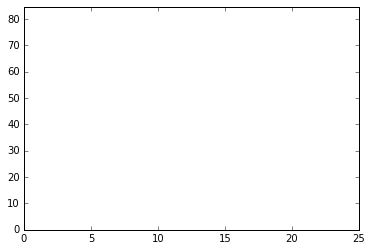

In [8]:
DFFig, DFAxes = plt.subplots()
DFAxes.set_xlim(( 0, maxx))
DFAxes.set_ylim((0, maxy))
DFLineData, = DFAxes.plot([], [], marker='H',    ls='none', MFC=(1,0,0,0),mec=(1,0,0,.25), label='Data')
DFLineFit,  = DFAxes.plot([], [], marker='None', ls='-',                                   label='Fit')

<p>Next, we set the parameters for the animation so that we don't have magic numbers floating around.</p>

In [9]:
AnimationFrames = 400  #total number of frames in animation.
DelayBetweenFrames = 41 #in msec (41.6 gives 24 fps)
MinDataPoints = 2
MaxDataPoints = 10000
NMultiplier = (MaxDataPoints - MinDataPoints)/AnimationFrames
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 16.4 seconds long.


In [10]:
xx=np.linspace(0, maxx)
def DFData(n):
    x = np.random.uniform(0., maxx, n)
    y = mtarget * x + btarget + np.random.normal(0., stddev, n)
    return (x,y)

def DFAnimator(n=10):
    n=int(NMultiplier*n + MinDataPoints)
    x,y = DFData(n)
    A = np.vstack([x,np.ones(len(x))]).T
    mfit, bfit = np.linalg.lstsq(A, y)[0]
    DFLineFit.set_data(xx,mfit*xx + bfit)
    DFLineData.set_data(x, y)
    return [DFLineData,DFLineFit]

In [11]:
DFAnim = animation.FuncAnimation(DFFig, DFAnimator ,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)

In [12]:
DFAnim

<h2>Interactive Example</h2>
<p>In the initilization section above, we gave some resources for learning about interactive widgets.  Armed with this information, we will again consider curve fitting to random data.  This time, we will vary the number of data points with an interactive slider widget using <a href=http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#interactive>interactive</a>.</p>

In [13]:
def DFFigure(n=10):
    x,y = DFData(n)
    A = np.vstack([x,np.ones(n)]).T
    mfit, bfit = np.linalg.lstsq(A, y)[0]
    DFLineFit.set_data(xx,mfit*xx + bfit)
    DFLineData.set_data(x, y)
    display(DFFig)

In [14]:
DFw=interactive(DFFigure,n=(MinDataPoints,MaxDataPoints),continuous_update=True)

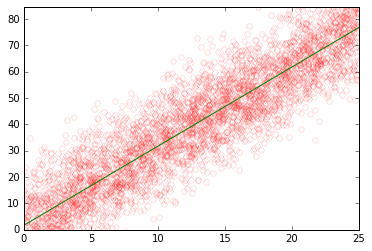

In [15]:
display(DFw)

<p>We can also create a widget with two sliders.  In this case, we will vary the number of points and the standard deviation in our generated data.  To do this, we will first create a <a href=https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#FloatSlider>FloatSlider</a> and <a href=https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#IntSlider>IntSlider</a> widgets and then use those in our call to interactive.  The function we call from interactive must accept two arguments.<p>

In [16]:
stddev_widget = widgets.FloatSlider(min=0.05, max=30.0, step=0.05, value=20.0)
n_widget = widgets.IntSlider(min=MinDataPoints,max=MaxDataPoints,step=10,value=(MinDataPoints+MaxDataPoints)/2)

def DFDataTwo(n, sd):
    x = np.random.uniform(0., maxx, n)
    y = mtarget * x + btarget + np.random.normal(0., sd, n)
    return (x,y)

def DFFigure(n, sd):
    x,y = DFDataTwo(n, sd)
    A = np.vstack([x,np.ones(n)]).T
    mfit, bfit = np.linalg.lstsq(A, y)[0]
    DFLineFit.set_data(xx,mfit*xx + bfit)
    DFLineData.set_data(x, y)
    display(DFFig)

DFwnew=interactive(DFFigure,n=n_widget,sd=stddev_widget,continuous_update=True)

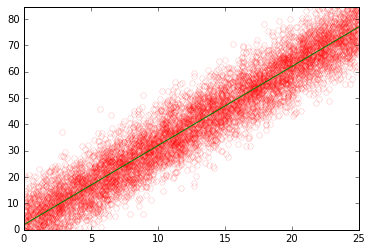

In [17]:
display(DFwnew)